# Project 9

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ufo_data2.csv')

In [3]:
df.head()

Date                     City            State    Country  \
0  2023-04-08 19:30:00       Brighton/Fairfield               IA        USA   
1  2023-04-08 18:45:00             Ocean Shores  New South Wales  Australia   
2  2023-04-08 05:39:00              Southampton               MA        USA   
3  2023-04-07 22:15:00  ST BRUNO DE MONTARVILLE           Quebec     Canada   
4  2023-04-07 21:55:00                  Bedford               VA        USA   

  Shape of UFO    Year  Month  Day  Hour  Minute  
0     Teardrop  2023.0    4.0  8.0  19.0    30.0  
1     Triangle  2023.0    4.0  8.0  18.0    45.0  
2        Light  2023.0    4.0  8.0   5.0    39.0  
3     Changing  2023.0    4.0  7.0  22.0    15.0  
4         Cube  2023.0    4.0  7.0  21.0    55.0

In [4]:
df = df[df['Country'] == 'USA']

In [5]:
df.head()

Date                City State Country Shape of UFO    Year  \
0  2023-04-08 19:30:00  Brighton/Fairfield    IA     USA     Teardrop  2023.0   
2  2023-04-08 05:39:00         Southampton    MA     USA        Light  2023.0   
4  2023-04-07 21:55:00             Bedford    VA     USA         Cube  2023.0   
5  2023-04-07 18:35:00          Scottsdale    AZ     USA      Unknown  2023.0   
6  2023-04-07 08:40:00           St. Louis    MO     USA      Unknown  2023.0   

   Month  Day  Hour  Minute  
0    4.0  8.0  19.0    30.0  
2    4.0  8.0   5.0    39.0  
4    4.0  7.0  21.0    55.0  
5    4.0  7.0  18.0    35.0  
6    4.0  7.0   8.0    40.0

In [6]:
df['Place'] = df['City'] + ', ' + df['State']

In [7]:
df.head()

Date                City State Country Shape of UFO    Year  \
0  2023-04-08 19:30:00  Brighton/Fairfield    IA     USA     Teardrop  2023.0   
2  2023-04-08 05:39:00         Southampton    MA     USA        Light  2023.0   
4  2023-04-07 21:55:00             Bedford    VA     USA         Cube  2023.0   
5  2023-04-07 18:35:00          Scottsdale    AZ     USA      Unknown  2023.0   
6  2023-04-07 08:40:00           St. Louis    MO     USA      Unknown  2023.0   

   Month  Day  Hour  Minute                   Place  
0    4.0  8.0  19.0    30.0  Brighton/Fairfield, IA  
2    4.0  8.0   5.0    39.0         Southampton, MA  
4    4.0  7.0  21.0    55.0             Bedford, VA  
5    4.0  7.0  18.0    35.0          Scottsdale, AZ  
6    4.0  7.0   8.0    40.0           St. Louis, MO

In [9]:
regions = {'WA': 'west', 'OR': 'west', 'ID': 'west', 'CA': 'west', 'NV': 'west', 'UT': 'west', 'CO': 'west', 'MT': 'west', 'WY': 'west', 'HI': 'west', 'AK': 'west',
               'AZ': 'swest', 'NM': 'swest', 'OK': 'swest', 'TX': 'swest',
               'KS': 'mwest', 'NE': 'mwest', 'SD': 'mwest', 'ND': 'mwest', 'MN': 'mwest', 'IA': 'mwest', 'WI': 'mwest', 'IL': 'mwest', 'IN': 'mwest', 'OH': 'mwest', 'MI': 'mwest',
               'AR': 'seast', 'LA': 'seast', 'MS': 'seast', 'AL': 'seast', 'GA': 'seast', 'FL': 'seast', 'SC': 'seast', 'NC': 'seast', 'TN': 'seast', 'KY': 'seast', 'WV': 'seast', 'VA': 'seast',
               'PA': 'neast', 'DE': 'neast', 'MD': 'neast', 'NJ': 'neast', 'RI': 'neast', 'CT': 'neast', 'MA': 'neast', 'NH': 'neast', 'NY': 'neast', 'VT': 'neast', 'ME': 'neast'}

In [11]:
df['Region'] = df['State'].map(regions)

In [40]:
df.head()

Date                City State Country Shape of UFO    Year  \
0  2023-04-08 19:30:00  Brighton/Fairfield    IA     USA     Teardrop  2023.0   
2  2023-04-08 05:39:00         Southampton    MA     USA        Light  2023.0   
4  2023-04-07 21:55:00             Bedford    VA     USA         Cube  2023.0   
5  2023-04-07 18:35:00          Scottsdale    AZ     USA      Unknown  2023.0   
6  2023-04-07 08:40:00           St. Louis    MO     USA      Unknown  2023.0   

   Month  Day  Hour  Minute                   Place Region  
0    4.0  8.0  19.0    30.0  Brighton/Fairfield, IA  mwest  
2    4.0  8.0   5.0    39.0         Southampton, MA  neast  
4    4.0  7.0  21.0    55.0             Bedford, VA  seast  
5    4.0  7.0  18.0    35.0          Scottsdale, AZ  swest  
6    4.0  7.0   8.0    40.0           St. Louis, MO    NaN

Text(0.5, 1.0, 'Percentage of UFO sightings across USA')

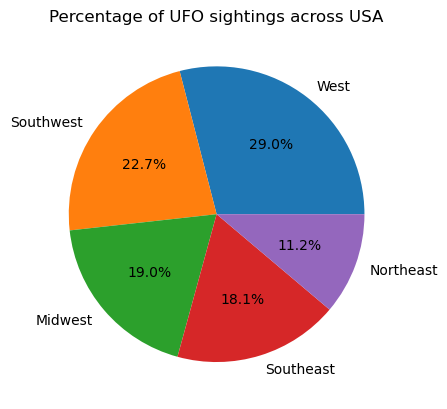

In [17]:
fig, ax = plt.subplots()
labels = ['West', 'Southwest', 'Midwest', 'Southeast', 'Northeast']
ax.pie(df['Region'].value_counts(), labels = labels, autopct = '%1.1f%%')
ax.set_title('Percentage of UFO sightings across USA')

In [21]:
import plotly.graph_objects as go

In [25]:
state_counts = df.groupby('State').size().reset_index(name = "count")

In [38]:
# Sourced from the internet to find 

fig = go.Figure(data = go.Choropleth(
    locations=state_counts['State'],
    z = state_counts['count'],
    locationmode='USA-states',
    colorscale = 'Blues',
    autocolorscale = False,
    marker_line_color='light gray',
    colorbar_title='UFO Sightings'
))

fig.update_layout(
    title_text='UFO Sightings in the USA',
    geo_scope='usa'
)

fig.show()

In [41]:
I asked Chat GPT to create

SyntaxError: invalid syntax (2738308355.py, line 1)

In [42]:
population = {
    'AL': 4921532,
    'AK': 731545,
    'AZ': 7421401,
    'AR': 3033946,
    'CA': 39538223,
    'CO': 5782171,
    'CT': 3605944,
    'DE': 990334,
    'FL': 21538187,
    'GA': 10711908,
    'HI': 1455271,
    'ID': 1839106,
    'IL': 12659682,
    'IN': 6745354,
    'IA': 3163561,
    'KS': 2913805,
    'KY': 4499692,
    'LA': 4648794,
    'ME': 1362359,
    'MD': 6177224,
    'MA': 7029917,
    'MI': 10077331,
    'MN': 5700671,
    'MS': 2961279,
    'MO': 6169038,
    'MT': 1084225,
    'NE': 1952570,
    'NV': 3205958,
    'NH': 1379089,
    'NJ': 9288994,
    'NM': 2117522,
    'NY': 20215751,
    'NC': 10453948,
    'ND': 779094,
    'OH': 11799448,
    'OK': 3990443,
    'OR': 4254083,
    'PA': 13011844,
    'RI': 1097379,
    'SC': 5124712,
    'SD': 886667,
    'TN': 6910840,
    'TX': 29145505,
    'UT': 3271616,
    'VT': 643077,
    'VA': 8654542,
    'WA': 7693612,
    'WV': 1795045,
    'WI': 5851754,
    'WY': 581307
}


In [44]:
df['Population'] = df['State'].map(population)

In [49]:
# Sourced from the internet to find 

fig = go.Figure(data = go.Choropleth(
    locations=state_counts['State'],
    z = state_counts['count'] / df['Population'],
    locationmode='USA-states',
    colorscale = 'Reds',
    autocolorscale = False,
    marker_line_color='light gray',
    colorbar_title='UFO Sightings'
))

fig.update_layout(
    title_text='UFO Sightings in the USA per Capita',
    geo_scope='usa'
)

fig.show()

In [53]:
# Sourced from the internet to find 

fig = go.Figure(data = go.Choropleth(
    locations = df['State'],
    z = df['Population'],
    locationmode='USA-states',
    colorscale = 'Greens',
    autocolorscale = False,
    marker_line_color='light gray',
    colorbar_title='Population'
))

fig.update_layout(
    title_text='Population Distribution of USA',
    geo_scope='usa'
)

fig.show()